In [2]:
pip install -U scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 3.8 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential

In [5]:
from skmultiflow.metrics import ClassificationPerformanceEvaluator, \
    WindowClassificationPerformanceEvaluator, \
    MultiLabelClassificationPerformanceEvaluator, \
    WindowMultiLabelClassificationPerformanceEvaluator, \
    RegressionMeasurements, WindowRegressionMeasurements, \
    MultiTargetRegressionMeasurements, WindowMultiTargetRegressionMeasurements, \
    RunningTimeMeasurements

In [6]:
from skmultiflow.data import FileStream, DataStream
from skmultiflow.data import WaveformGenerator
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
from skmultiflow.evaluation import EvaluatePrequential
from scipy.io import arff
import pandas as pd
# 1. Create a stream
basePth = "/content/drive/My Drive/5155-hw4"
abruptPth = basePth + "/" + "INSECTS-abrupt_balanced_norm.arff"
incrementalPth = basePth + "/" + "INSECTS-incremental_balanced_norm.arff"
gradualPth = basePth + "/" + "INSECTS-gradual_balanced_norm.arff"

abrupt_data, abrupt_meta = arff.loadarff(abruptPth)
incremental_data, incremental_meta = arff.loadarff(incrementalPth)
gradual_data, gradual_meta = arff.loadarff(gradualPth)

In [7]:
import matplotlib.pyplot as plt

In [8]:
incremental_data = pd.DataFrame(incremental_data)
incremental_data['class'] = incremental_data['class'].map({b'ae-albopictus-female': 0,
                             b'cx-quinq-female': 1,
                             b'ae-aegypti-male': 2,
                             b'cx-quinq-male':3,
                             b'ae-aegypti-female': 4,
                             b'ae-albopictus-male' : 5,
                             },
                             na_action=None
                           )
incremental_data.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.162919,0.223581,0.170982,0.210447,0.260262,0.313684,0.210527,0.129912,0.108045,0.314143,...,0.184005,0.107587,0.029085,0.019693,0.005861,0.024745,0.012178,0.007580,0.006055,0
1,0.179910,0.015617,0.018342,0.111462,0.028435,0.164292,0.105495,0.085920,0.079683,0.048566,...,0.008929,0.016024,0.024117,0.021911,0.010983,0.010770,0.010413,0.009680,0.007052,0
2,0.093009,0.171964,0.103600,0.193611,0.206219,0.260224,0.183089,0.275424,0.240193,0.236459,...,0.030383,0.024538,0.023142,0.027263,0.019545,0.021473,0.022304,0.016444,0.013020,3
3,0.364570,0.120045,0.186800,0.226773,0.280583,0.335924,0.229092,0.217283,0.212943,0.101705,...,0.032920,0.181381,0.292963,0.176154,0.028934,0.014860,0.024450,0.061111,0.008718,0
4,0.257008,0.353529,0.007418,0.330596,0.027673,0.239377,0.283919,0.036563,0.088543,0.056334,...,0.007628,0.009555,0.005842,0.019820,0.006230,0.005064,0.009392,0.007614,0.005202,2


In [9]:
incremental_data.shape

(57018, 34)

In [10]:
gradual_data = pd.DataFrame(gradual_data)
gradual_data['class'] = gradual_data['class'].map({b'ae-albopictus-female': 0,
                             b'cx-quinq-female': 1,
                             b'ae-aegypti-male': 2,
                             b'cx-quinq-male':3,
                             b'ae-aegypti-female': 4,
                             b'ae-albopictus-male' : 5,
                             },
                             na_action=None
                           )
gradual_data.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.221687,0.278738,0.230267,0.012072,0.291936,0.368676,0.306643,0.148194,0.373911,0.239031,...,0.031280,0.117695,0.086213,0.051817,0.032058,0.024235,0.057984,0.084282,0.246349,4
1,0.216156,0.248490,0.207935,0.277610,0.012118,0.022270,0.215332,0.034307,0.032627,0.038244,...,0.011887,0.006941,0.005115,0.004826,0.006064,0.024626,0.088533,0.052340,0.025880,4
2,0.458254,0.011934,0.290734,0.228966,0.108324,0.422456,0.334562,0.075886,0.055659,0.032657,...,0.014689,0.043372,0.038154,0.019074,0.013496,0.023259,0.085427,0.143533,0.107721,2
3,0.399140,0.452438,0.375610,0.500829,0.002449,0.606104,0.563900,0.011115,0.007772,0.005426,...,0.002710,0.011455,0.037303,0.308902,0.297547,0.099780,0.020431,0.005512,0.006190,2
4,0.418305,0.479065,0.397929,0.000868,0.511484,0.643908,0.604099,0.015001,0.007669,0.003962,...,0.003295,0.006972,0.010259,0.031866,0.212833,0.203114,0.100263,0.019290,0.012371,2


In [11]:
gradual_data.shape

(24150, 34)

In [13]:
abrupt_data = pd.DataFrame(abrupt_data)
abrupt_data['class'] = abrupt_data['class'].map({b'ae-albopictus-female': 0,
                             b'cx-quinq-female': 1,
                             b'ae-aegypti-male': 2,
                             b'cx-quinq-male':3,
                             b'ae-aegypti-female': 4,
                             b'ae-albopictus-male' : 5,
                             },
                           #  na_action=None
                           )
abrupt_data.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,0
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,0
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776,1
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552,0
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058,2


In [14]:
abrupt_data.shape

(52848, 34)

In [176]:
abrupt_stream = DataStream(abrupt_data, target_idx = -1, n_targets = 1)

In [177]:
gradual_stream = DataStream(gradual_data, target_idx = -1, n_targets = 1)

In [178]:
incremental_stream = DataStream(incremental_data, target_idx = -1, n_targets = 1)

In [13]:
# increamental stream
# Setup the evaluator
%matplotlib notebook
sc = SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,
                              stm_size_option='maxACCApprox', use_ltm=False)
ht = HoeffdingTreeClassifier()
hat = HoeffdingAdaptiveTreeClassifier()
arf = AdaptiveRandomForestClassifier()
awe = AccuracyWeightedEnsembleClassifier()

evaluator = EvaluatePrequential(pretrain_size=0, max_samples=1000, batch_size=1,
                               # n_wait=100, max_time=1000, output_file=None,
                                show_plot=True, metrics=['accuracy'])
# Evaluate
evaluator.evaluate(stream=incremental_stream, model=[sc,ht,hat,arf,awe])

<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [40.57s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.3740
M1 - Accuracy     : 0.4540
M2 - Accuracy     : 0.4430
M3 - Accuracy     : 0.4730
M4 - Accuracy     : 0.4070


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='distance'),
 HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=200, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_prepr

In [14]:
# gradual stream
# Setup the evaluator
%matplotlib notebook
sc = SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,
                              stm_size_option='maxACCApprox', use_ltm=False)
ht = HoeffdingTreeClassifier()
hat = HoeffdingAdaptiveTreeClassifier()
arf = AdaptiveRandomForestClassifier()
awe = AccuracyWeightedEnsembleClassifier()
evaluator = EvaluatePrequential(pretrain_size=0, max_samples=1000, batch_size=1,
                               # n_wait=100, max_time=1000, output_file=None,
                                show_plot=True, metrics=['accuracy'])
# Evaluate
evaluator.evaluate(stream=gradual_stream, model=[sc,ht,hat,arf,awe])

<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [35.18s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.6150
M1 - Accuracy     : 0.6260
M2 - Accuracy     : 0.6330
M3 - Accuracy     : 0.6500
M4 - Accuracy     : 0.5850


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='distance'),
 HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=200, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_prepr

In [15]:
# abrupt stream
# Setup the evaluator
%matplotlib notebook
sc = SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,
                              stm_size_option='maxACCApprox', use_ltm=False)
ht = HoeffdingTreeClassifier()
hat = HoeffdingAdaptiveTreeClassifier()
arf = AdaptiveRandomForestClassifier()
awe = AccuracyWeightedEnsembleClassifier()

evaluator = EvaluatePrequential(pretrain_size=0, max_samples=1000, batch_size=1,
                               # n_wait=100, max_time=1000, output_file=None,
                                show_plot=True, metrics=['accuracy'])
# Evaluate
evaluator.evaluate(stream=abrupt_stream, model=[sc,ht,hat,arf,awe])

<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [38.43s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.6150
M1 - Accuracy     : 0.6260
M2 - Accuracy     : 0.6170
M3 - Accuracy     : 0.6510
M4 - Accuracy     : 0.5850


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='distance'),
 HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=200, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_prepr

In [104]:
def no_change_classifier(stream):
    stream.restart()
    print("No-change Classifier")
    pretrain_size = 1000
    n_sliding = 1000
    current_eval_measurement = WindowClassificationPerformanceEvaluator(window_size=n_sliding)
    actual_max_samples = stream.n_remaining_samples()
    global_sample_count = 0
    # pre-training
    print('Pre-training on {} sample(s).'.format(pretrain_size))
    X, y = stream.next_sample(pretrain_size)
    prediction = y[-1]
    global_sample_count += pretrain_size
    
    print('Evaluating...')
    update_count = 0
    acc = []
    while (stream.has_more_samples()):
        X, y = stream.next_sample()
        global_sample_count += 1
        # test
        current_eval_measurement.add_result(y, prediction)
        
        # train
        prediction = y
        
        # update metric
        if ((global_sample_count % n_sliding == 0) or
            (global_sample_count >= actual_max_samples) or
            (global_sample_count / n_sliding > update_count + 1)):
            acc.append(current_eval_measurement.accuracy_score())
            update_count += 1
     
    stream.restart()
    print("Finished\n")
    return acc

In [105]:
def majority_classifier(stream):
    stream.restart()
    print("majority_classifier")
    pretrain_size = 1000
    n_sliding = 1000
    current_eval_measurement = WindowClassificationPerformanceEvaluator(window_size=n_sliding)
    actual_max_samples = stream.n_remaining_samples()
    global_sample_count = 0
    # pre-training
    print('Pre-training on {} sample(s).'.format(pretrain_size))
    X, y = stream.next_sample(pretrain_size)
    prediction = Counter(y).most_common(1)[0][0]
    global_sample_count += pretrain_size
    
    print('Evaluating...')
    update_count = 0
    acc = []
    pred = [i for i in y]
    while (stream.has_more_samples()):
        pred.pop(0)
        X, y = stream.next_sample()
        pred.append(y[0])
        global_sample_count += 1
        # test
        current_eval_measurement.add_result(y, prediction)
        
        # train
        prediction = Counter(pred).most_common(1)[0][0]
        
        # update metric
        if ((global_sample_count % n_sliding == 0) or
            (global_sample_count >= actual_max_samples) or
            (global_sample_count / n_sliding > update_count + 1)):
            acc.append(current_eval_measurement.accuracy_score())
            update_count += 1
        
    stream.restart()
    print("Finished\n")
    return acc

In [22]:
def model_acc(data,classifier,n_sliding = 1000,window_size = 1000):
    # Setup the File Stream
    current_eval_measurement = WindowClassificationPerformanceEvaluator(window_size=1000)
    stream = DataStream(data, target_idx = -1, n_targets = 1)
    # Setup the classifier
    classifier = classifier
    n_sliding = 1000
    actual_max_samples = stream.n_remaining_samples()
    global_sample_count = 0
    update_count = 0

    # Train the estimator with the samples provided by the data stream
    acc = []
    while stream.has_more_samples():
        X, y = stream.next_sample()
        global_sample_count += 1
        y_pred = classifier.predict(X)
        current_eval_measurement.add_result(y, y_pred)

        classifier.partial_fit(X, y)

        if ((global_sample_count % n_sliding == 0) or
           (global_sample_count >= actual_max_samples) or
           (global_sample_count / n_sliding > update_count + 1)):
            acc.append(current_eval_measurement.accuracy_score())
            update_count += 1
    return acc,update_count

In [23]:
#Q2 abrupt_data
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
acc1 = model_acc(abrupt_data,SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,stm_size_option='maxACCApprox', use_ltm=False))[0]
acc2 = model_acc(abrupt_data,HoeffdingTreeClassifier())[0]
acc3 = model_acc(abrupt_data,HoeffdingAdaptiveTreeClassifier())[0]
acc4 = model_acc(abrupt_data,AdaptiveRandomForestClassifier())[0]
acc5 = model_acc(abrupt_data,AccuracyWeightedEnsembleClassifier())[0]

In [109]:
acc_a_nc = no_change_classifier(abrupt_stream)
acc_a_m = majority_classifier(abrupt_stream)

No-change Classifier
Pre-training on 1000 sample(s).
Evaluating...
Finished

majority_classifier
Pre-training on 1000 sample(s).
Evaluating...
Finished



In [119]:
acc_table_a = {}

In [124]:
acc_table_a['dataset'] = 'abrupt'
acc_table_a['no_change'] = np.mean(acc_a_nc)
acc_table_a['majority'] = np.mean(acc_a_m)
acc_table_a['sam_knn'] = np.mean(acc1)
acc_table_a['HoeffdingTree'] = np.mean(acc2)
acc_table_a['HoeffdingAdaptiveTree'] = np.mean(acc3)
acc_table_a['AdaptiveRandomForest'] = np.mean(acc4)
acc_table_a['AccuracyWeightedEnsemble'] = np.mean(acc5)

In [125]:
acc_table_a

{'dataset': 'abrupt',
 'no_change': 0.286811320754717,
 'majority': 0.29339622641509433,
 'sam_knn': 0.69588679245283,
 'HoeffdingTree': 0.5394150943396226,
 'HoeffdingAdaptiveTree': 0.6102264150943397,
 'AdaptiveRandomForest': 0.7504528301886793,
 'AccuracyWeightedEnsemble': 0.614754716981132}

In [94]:
# acc1 = acc1.values.tolist()
# acc2 = acc2.values.tolist()
# acc3 = acc3.values.tolist()
# acc4 = acc4.values.tolist()
# acc5 = acc5.values.tolist()

In [92]:
# acc1 = pd.DataFrame(acc1)
# acc2 = pd.DataFrame(acc2)
# acc3 = pd.DataFrame(acc3)
# acc4 = pd.DataFrame(acc4)
# acc5 = pd.DataFrame(acc5)

In [93]:
# acc1.to_csv('/content/drive/My Drive/5155-hw4/acc1.csv',index = None)
# acc2.to_csv('/content/drive/My Drive/5155-hw4/acc2.csv',index = None)
# acc3.to_csv('/content/drive/My Drive/5155-hw4/acc3.csv',index = None)
# acc4.to_csv('/content/drive/My Drive/5155-hw4/acc4.csv',index = None)
# acc5.to_csv('/content/drive/My Drive/5155-hw4/acc5.csv',index = None)

In [73]:
n_slide1 = [i for i in range(len(acc1))]

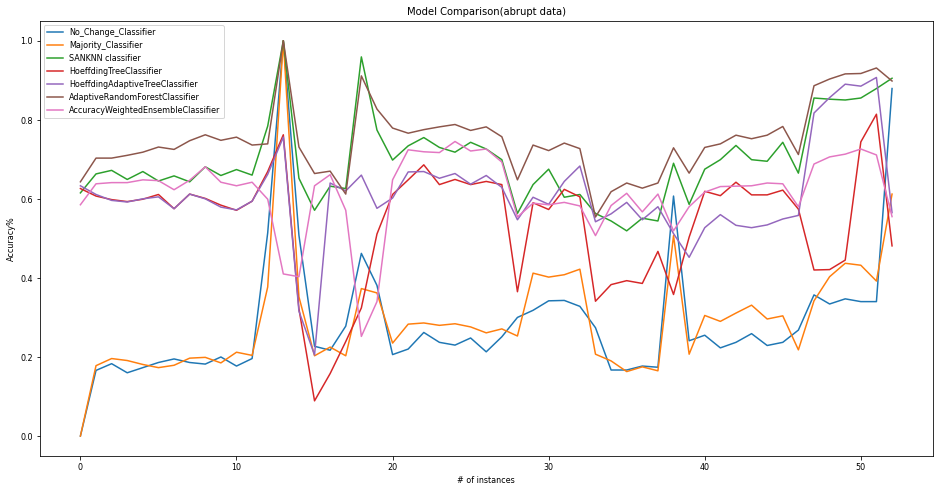

In [137]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.xlabel('# of instances')
plt.ylabel('Accuracy%')
plt.title("Model Comparison(abrupt data)")
plt.plot(n_slide1,acc_a_nc,label = 'No_Change_Classifier')
plt.plot(n_slide1,acc_a_m,label = 'Majority_Classifier')
plt.plot(n_slide1,acc1,label = 'SANKNN classifier')
plt.plot(n_slide1,acc2,label = 'HoeffdingTreeClassifier')
plt.plot(n_slide1,acc3,label = 'HoeffdingAdaptiveTreeClassifier')
plt.plot(n_slide1,acc4,label = 'AdaptiveRandomForestClassifier')
plt.plot(n_slide1,acc5,label = 'AccuracyWeightedEnsembleClassifier')
plt.legend()
plt.show()

In [149]:
#Q2 gradual_data
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
acc6 = model_acc(gradual_data,SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,stm_size_option='maxACCApprox', use_ltm=False))[0]
acc7 = model_acc(gradual_data,HoeffdingTreeClassifier())[0]
acc8 = model_acc(gradual_data,HoeffdingAdaptiveTreeClassifier())[0]
acc9 = model_acc(gradual_data,AdaptiveRandomForestClassifier())[0]
acc10 = model_acc(gradual_data,AccuracyWeightedEnsembleClassifier())[0]

In [150]:
acc_g_nc = no_change_classifier(gradual_stream)
acc_g_m = majority_classifier(gradual_stream)

No-change Classifier
Pre-training on 1000 sample(s).
Evaluating...
Finished

majority_classifier
Pre-training on 1000 sample(s).
Evaluating...
Finished



In [151]:
acc_table_g = {}

In [152]:
acc_table_g['dataset'] = 'gradual'
acc_table_g['no_change'] = np.mean(acc_g_nc)
acc_table_g['majority'] = np.mean(acc_g_m)
acc_table_g['sam_knn'] = np.mean(acc6)
acc_table_g['HoeffdingTree'] = np.mean(acc7)
acc_table_g['HoeffdingAdaptiveTree'] = np.mean(acc8)
acc_table_g['AdaptiveRandomForest'] = np.mean(acc9)
acc_table_g['AccuracyWeightedEnsemble'] = np.mean(acc10)

In [153]:
acc_table_g

{'dataset': 'gradual',
 'no_change': 0.36707999999999996,
 'majority': 0.3936,
 'sam_knn': 0.7500800000000001,
 'HoeffdingTree': 0.6108,
 'HoeffdingAdaptiveTree': 0.6255999999999999,
 'AdaptiveRandomForest': 0.7804400000000001,
 'AccuracyWeightedEnsemble': 0.61568}

In [160]:
# acc6 = acc6.values.tolist()
# acc7 = acc7.values.tolist()
# acc8 = acc8.values.tolist()
# acc9 = acc9.values.tolist()
# acc10 = acc10.values.tolist()

In [158]:
# acc6 = pd.DataFrame(acc6)
# acc7 = pd.DataFrame(acc7)
# acc8 = pd.DataFrame(acc8)
# acc9 = pd.DataFrame(acc9)
# acc10 = pd.DataFrame(acc10)

In [159]:
# acc6.to_csv('/content/drive/My Drive/5155-hw4/acc6.csv',index = None)
# acc7.to_csv('/content/drive/My Drive/5155-hw4/acc7.csv',index = None)
# acc8.to_csv('/content/drive/My Drive/5155-hw4/acc8.csv',index = None)
# acc9.to_csv('/content/drive/My Drive/5155-hw4/acc9.csv',index = None)
# acc10.to_csv('/content/drive/My Drive/5155-hw4/acc10.csv',index = None)

In [154]:
n_slides2 = [i for i in range(len(acc6))]

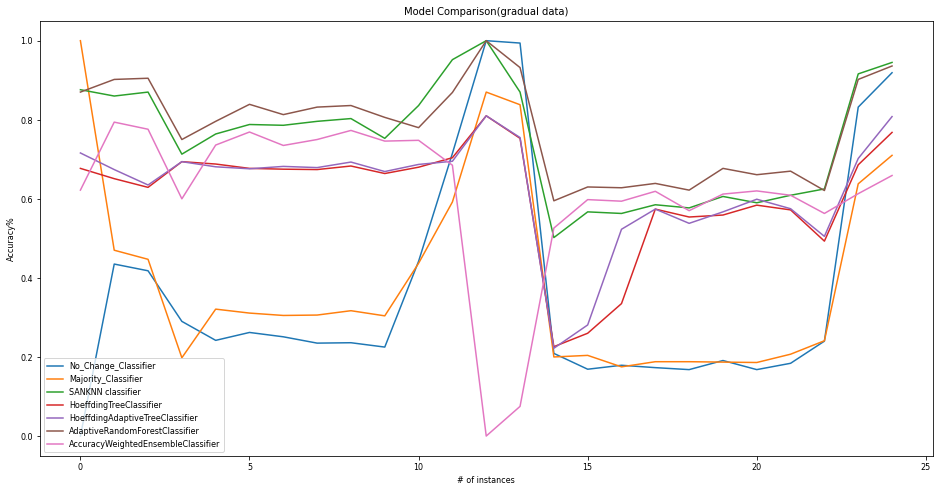

In [155]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.xlabel('# of instances')
plt.ylabel('Accuracy%')
plt.title("Model Comparison(gradual data)")
plt.plot(n_slides2,acc_g_nc,label = 'No_Change_Classifier')
plt.plot(n_slides2,acc_g_m,label = 'Majority_Classifier')
plt.plot(n_slides2,acc6,label = 'SANKNN classifier')
plt.plot(n_slides2,acc7,label = 'HoeffdingTreeClassifier')
plt.plot(n_slides2,acc8,label = 'HoeffdingAdaptiveTreeClassifier')
plt.plot(n_slides2,acc9,label = 'AdaptiveRandomForestClassifier')
plt.plot(n_slides2,acc10,label = 'AccuracyWeightedEnsembleClassifier')
plt.legend()

In [36]:
#Q2 incremental_data
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
acc11 = model_acc(incremental_data,SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,stm_size_option='maxACCApprox', use_ltm=False))[0]
acc12 = model_acc(incremental_data,HoeffdingTreeClassifier())[0]
acc13 = model_acc(incremental_data,HoeffdingAdaptiveTreeClassifier())[0]
acc14 = model_acc(incremental_data,AdaptiveRandomForestClassifier())[0]
acc15 = model_acc(incremental_data,AccuracyWeightedEnsembleClassifier())[0]

In [117]:
acc_i_nc = no_change_classifier(incremental_stream)
acc_i_m = majority_classifier(incremental_stream)

No-change Classifier
Pre-training on 1000 sample(s).
Evaluating...
Finished

majority_classifier
Pre-training on 1000 sample(s).
Evaluating...
Finished



In [102]:
# acc11 = acc11.values.tolist()
# acc12 = acc12.values.tolist()
# acc13 = acc13.values.tolist()
# acc14 = acc14.values.tolist()
# acc15 = acc15.values.tolist()

In [100]:
# acc11 = pd.DataFrame(acc11)
# acc12 = pd.DataFrame(acc12)
# acc13 = pd.DataFrame(acc13)
# acc14 = pd.DataFrame(acc14)
# acc15 = pd.DataFrame(acc15)

In [101]:
# acc11.to_csv('/content/drive/My Drive/5155-hw4/acc11.csv',index = None)
# acc12.to_csv('/content/drive/My Drive/5155-hw4/acc12.csv',index = None)
# acc13.to_csv('/content/drive/My Drive/5155-hw4/acc13.csv',index = None)
# acc14.to_csv('/content/drive/My Drive/5155-hw4/acc14.csv',index = None)
# acc15.to_csv('/content/drive/My Drive/5155-hw4/acc15.csv',index = None)

In [83]:
n_slides3 = [i for i in range(len(acc11))]

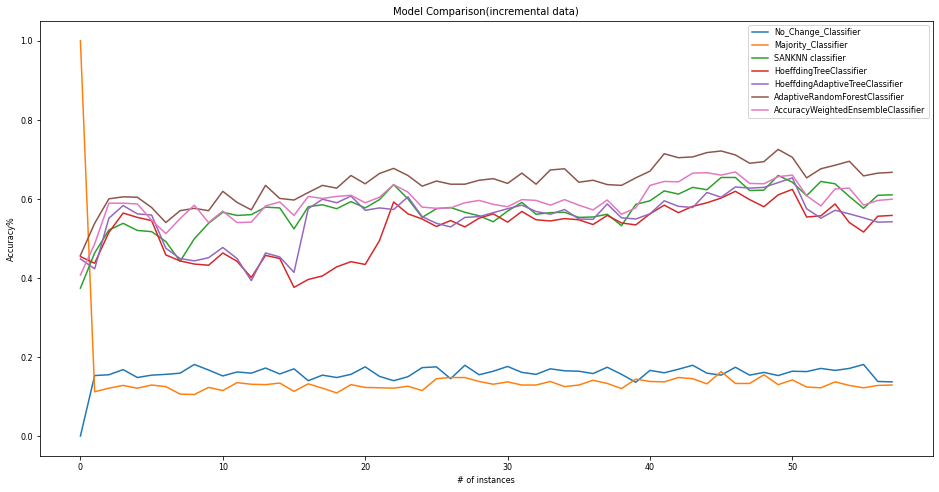

In [140]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.xlabel('# of instances')
plt.ylabel('Accuracy%')
plt.title("Model Comparison(incremental data)")
plt.plot(n_slides3,acc_i_nc,label = 'No_Change_Classifier')
plt.plot(n_slides3,acc_i_m,label = 'Majority_Classifier')
plt.plot(n_slides3,acc11,label = 'SANKNN classifier')
plt.plot(n_slides3,acc12,label = 'HoeffdingTreeClassifier')
plt.plot(n_slides3,acc13,label = 'HoeffdingAdaptiveTreeClassifier')
plt.plot(n_slides3,acc14,label = 'AdaptiveRandomForestClassifier')
plt.plot(n_slides3,acc15,label = 'AccuracyWeightedEnsembleClassifier')
plt.legend()

In [129]:
acc_table_i = {}
acc_table_i['dataset'] = 'incremental'
acc_table_i['no_change'] = np.mean(acc_i_nc)
acc_table_i['majority'] = np.mean(acc_i_m)
acc_table_i['sam_knn'] = np.mean(acc11)
acc_table_i['HoeffdingTree'] = np.mean(acc12)
acc_table_i['HoeffdingAdaptiveTree'] = np.mean(acc13)
acc_table_i['AdaptiveRandomForest'] = np.mean(acc14)
acc_table_i['AccuracyWeightedEnsemble'] = np.mean(acc15)

In [130]:
acc_table_i

{'dataset': 'incremental',
 'no_change': 0.15782758620689655,
 'majority': 0.1449655172413793,
 'sam_knn': 0.5731551724137931,
 'HoeffdingTree': 0.5222068965517241,
 'HoeffdingAdaptiveTree': 0.5489827586206897,
 'AdaptiveRandomForest': 0.6419482758620689,
 'AccuracyWeightedEnsemble': 0.5928620689655172}

In [132]:
df_acc_a = pd.DataFrame(acc_table_a,index = [0])
df_acc_a

,dataset,no_change,majority,sam_knn,HoeffdingTree,HoeffdingAdaptiveTree,AdaptiveRandomForest,AccuracyWeightedEnsemble
0,abrupt,0.286811,0.293396,0.695887,0.539415,0.610226,0.750453,0.614755


In [156]:
df_acc_g = pd.DataFrame(acc_table_g,index = [0])
df_acc_g

,dataset,no_change,majority,sam_knn,HoeffdingTree,HoeffdingAdaptiveTree,AdaptiveRandomForest,AccuracyWeightedEnsemble
0,gradual,0.36708,0.3936,0.75008,0.6108,0.6256,0.78044,0.61568


In [134]:
df_acc_i = pd.DataFrame(acc_table_i,index = [0])
df_acc_i

,dataset,no_change,majority,sam_knn,HoeffdingTree,HoeffdingAdaptiveTree,AdaptiveRandomForest,AccuracyWeightedEnsemble
0,incremental,0.157828,0.144966,0.573155,0.522207,0.548983,0.641948,0.592862


In [157]:
df_acc = pd.concat([df_acc_a,df_acc_g,df_acc_i])
df_acc

,dataset,no_change,majority,sam_knn,HoeffdingTree,HoeffdingAdaptiveTree,AdaptiveRandomForest,AccuracyWeightedEnsemble
0,abrupt,0.286811,0.293396,0.695887,0.539415,0.610226,0.750453,0.614755
0,gradual,0.367080,0.393600,0.750080,0.610800,0.625600,0.780440,0.615680
0,incremental,0.157828,0.144966,0.573155,0.522207,0.548983,0.641948,0.592862


In [199]:
# Q4  HoeffdingTreeClassifier abrupt with drift
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.data import FileStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.drift_detection import DDM
ddm = DDM()
%matplotlib notebook
# Setup the File Stream
current_eval_measurement = WindowClassificationPerformanceEvaluator(window_size=1000)
abrupt_stream = DataStream(abrupt_data, target_idx = -1, n_targets = 1)
# Setup the classifier
classifier = HoeffdingTreeClassifier()
classifier1 = None
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, max_samples=abrupt_data.shape[0], batch_size=1,
                             #   n_wait=100, max_time=1000, output_file=None,
                                show_plot=True, metrics=['accuracy'])
# drift process
# n_samples = 0
# max_samples = 1000
correct_cnt = 0
n_sliding = 1000
actual_max_samples = abrupt_stream.n_remaining_samples()
global_sample_count = 0
update_count = 0
# Train the estimator with the samples provided by the data stream
# DRIFT
acc2_ = []
while abrupt_stream.has_more_samples():
    X, y = abrupt_stream.next_sample()
#     print(X.shape)
#     print(y.shape)
    global_sample_count += 1
    for i in range(X.shape[1]):
        ddm.add_element(X[0,i])
    
        if ddm.detected_warning_zone():
#             print('Warning zone has been detected in data: ' + str(X[0,i]) + ' - of index: ' + str(i))
            classifier1 = HoeffdingTreeClassifier()
        if ddm.detected_change():
            print('Change has been detected in data: ' + str(X[0,i]) + ' - of index: ' + str(global_sample_count) + " " + str(i))
            classifier = classifier1
            
    #train    
    y_pred = classifier.predict(X)
    current_eval_measurement.add_result(y, y_pred)
    
    if y[0] == y_pred[0]:
        correct_cnt += 1
        
    classifier.partial_fit(X, y)
    if classifier1 != None:
      classifier1.partial_fit(X, y)
    
    if ((global_sample_count % n_sliding == 0) or
           (global_sample_count >= actual_max_samples) or
           (global_sample_count / n_sliding > update_count + 1)):
            acc2_.append(current_eval_measurement.accuracy_score())
            update_count += 1
#     acc.append(current_eval_measurement.accuracy_score())
#     n_samples += 1


# Evaluate
# evaluator.evaluate(stream=abrupt_stream, model=classifier)

Change has been detected in data: 0.613125 - of index: 32098 6
Change has been detected in data: 0.28306 - of index: 40882 1


In [200]:
n_ins = [i for i in range(len(acc2_))]

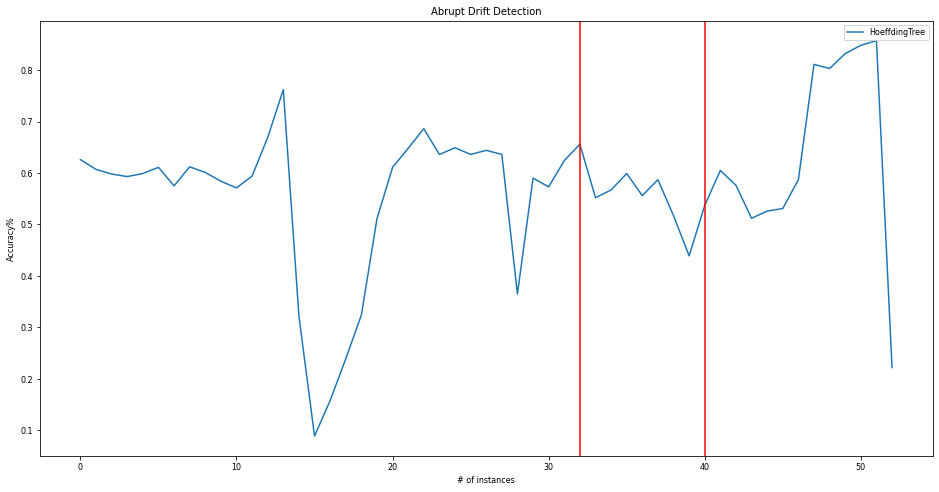

In [201]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.xlabel('# of instances')
plt.ylabel('Accuracy%')
plt.title("Abrupt Drift Detection")
plt.plot(n_ins,acc2_,label = 'HoeffdingTree')
plt.axvline(x = 32097//1000,color = 'red')
plt.axvline(x = 40881//1000,color = 'red')
plt.legend()
plt.show()

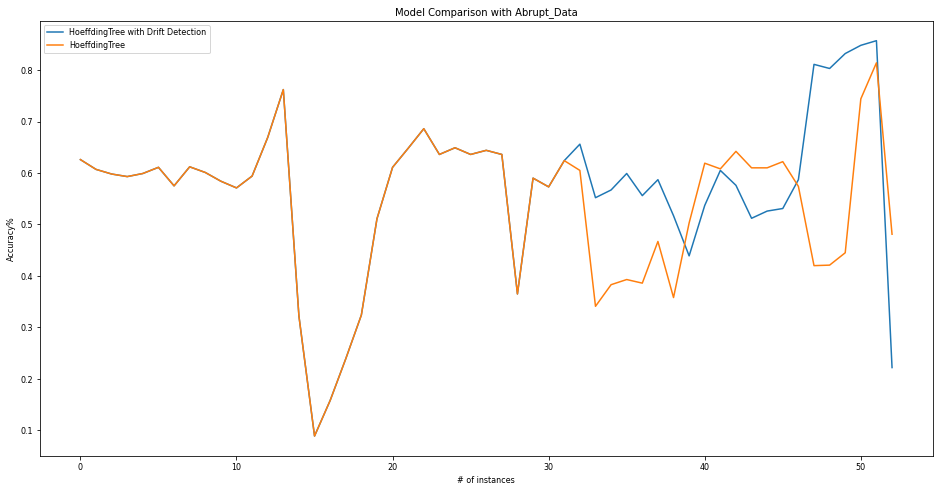

In [202]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.xlabel('# of instances')
plt.ylabel('Accuracy%')
plt.title("Model Comparison with Abrupt_Data")
plt.plot(n_ins,acc2_,label = 'HoeffdingTree with Drift Detection')
plt.plot(n_slide1,acc2,label = 'HoeffdingTree')
plt.legend()
plt.show()

In [203]:
# Q4  HoeffdingTreeClassifier gradual with drift
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.data import FileStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.drift_detection import DDM
ddm = DDM()
%matplotlib notebook
# Setup the File Stream
current_eval_measurement = WindowClassificationPerformanceEvaluator(window_size=1000)
gradual_stream = DataStream(gradual_data, target_idx = -1, n_targets = 1)
# Setup the classifier
classifier = HoeffdingTreeClassifier()
classifier1 = None
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, max_samples=abrupt_data.shape[0], batch_size=1,
                             #   n_wait=100, max_time=1000, output_file=None,
                                show_plot=True, metrics=['accuracy'])
# drift process
# n_samples = 0
# max_samples = 1000
correct_cnt = 0
n_sliding = 1000
actual_max_samples = gradual_stream.n_remaining_samples()
global_sample_count = 0
update_count = 0
# Train the estimator with the samples provided by the data stream
# DRIFT
acc7_ = []
while gradual_stream.has_more_samples():
    X, y = gradual_stream.next_sample()
#     print(X.shape)
#     print(y.shape)
    global_sample_count += 1
    for i in range(X.shape[1]):
        ddm.add_element(X[0,i])
    
        if ddm.detected_warning_zone():
#             print('Warning zone has been detected in data: ' + str(X[0,i]) + ' - of index: ' + str(i))
            classifier1 = HoeffdingTreeClassifier()
        if ddm.detected_change():
            print('Change has been detected in data: ' + str(X[0,i]) + ' - of index: ' + str(global_sample_count) + " " + str(i))
            classifier = classifier1
            
    #train    
    y_pred = classifier.predict(X)
    current_eval_measurement.add_result(y, y_pred)
    
    if y[0] == y_pred[0]:
        correct_cnt += 1
        
    classifier.partial_fit(X, y)
    if classifier1 != None:
      classifier1.partial_fit(X, y)
    
    if ((global_sample_count % n_sliding == 0) or
           (global_sample_count >= actual_max_samples) or
           (global_sample_count / n_sliding > update_count + 1)):
            acc7_.append(current_eval_measurement.accuracy_score())
            update_count += 1
#     acc.append(current_eval_measurement.accuracy_score())
#     n_samples += 1


# Evaluate
# evaluator.evaluate(stream=abrupt_stream, model=classifier)

In [204]:
# Q4  HoeffdingTreeClassifier incremental with drift
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.data import FileStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.drift_detection import DDM
ddm = DDM()
%matplotlib notebook
# Setup the File Stream
current_eval_measurement = WindowClassificationPerformanceEvaluator(window_size=1000)
incremental_stream = DataStream(incremental_data, target_idx = -1, n_targets = 1)
# Setup the classifier
classifier = HoeffdingTreeClassifier()
classifier1 = None
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, max_samples=abrupt_data.shape[0], batch_size=1,
                             #   n_wait=100, max_time=1000, output_file=None,
                                show_plot=True, metrics=['accuracy'])
# drift process
# n_samples = 0
# max_samples = 1000
correct_cnt = 0
n_sliding = 1000
actual_max_samples = incremental_stream.n_remaining_samples()
global_sample_count = 0
update_count = 0
# Train the estimator with the samples provided by the data stream
# DRIFT
acc12_ = []
while incremental_stream.has_more_samples():
    X, y = incremental_stream.next_sample()
#     print(X.shape)
#     print(y.shape)
    global_sample_count += 1
    for i in range(X.shape[1]):
        ddm.add_element(X[0,i])
    
        if ddm.detected_warning_zone():
#             print('Warning zone has been detected in data: ' + str(X[0,i]) + ' - of index: ' + str(i))
            classifier1 = HoeffdingTreeClassifier()
        if ddm.detected_change():
            print('Change has been detected in data: ' + str(X[0,i]) + ' - of index: ' + str(global_sample_count) + " " + str(i))
            classifier = classifier1
            
    #train    
    y_pred = classifier.predict(X)
    current_eval_measurement.add_result(y, y_pred)
    
    if y[0] == y_pred[0]:
        correct_cnt += 1
        
    classifier.partial_fit(X, y)
    if classifier1 != None:
      classifier1.partial_fit(X, y)
    
    if ((global_sample_count % n_sliding == 0) or
           (global_sample_count >= actual_max_samples) or
           (global_sample_count / n_sliding > update_count + 1)):
            acc12_.append(current_eval_measurement.accuracy_score())
            update_count += 1
#     acc.append(current_eval_measurement.accuracy_score())
#     n_samples += 1


# Evaluate
# evaluator.evaluate(stream=abrupt_stream, model=classifier)

Change has been detected in data: 0.505872 - of index: 6554 6
Change has been detected in data: 0.37805 - of index: 49190 4


In [205]:
n_ins3 = [i for i in range(len(acc12_))]

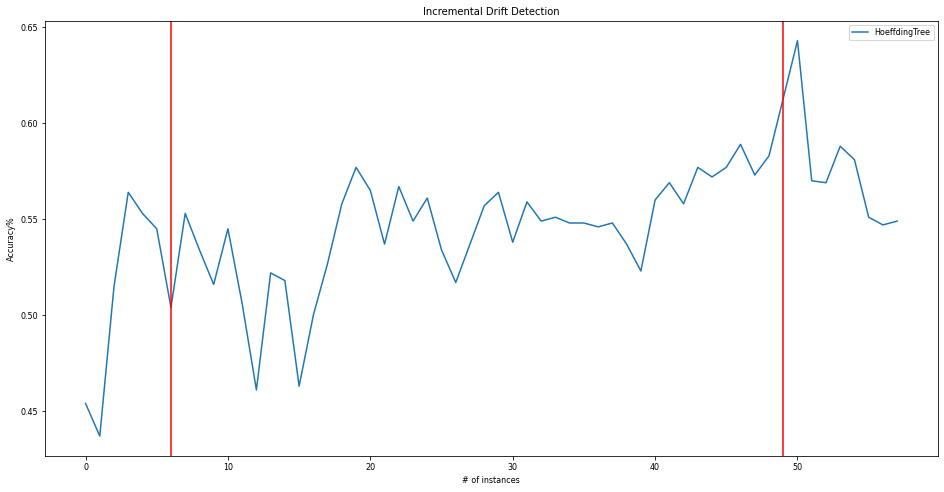

In [208]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.xlabel('# of instances')
plt.ylabel('Accuracy%')
plt.title("Incremental Drift Detection")
plt.plot(n_ins3,acc12_,label = 'HoeffdingTree')
plt.axvline(x = 6553//1000,color = 'red')
plt.axvline(x = 49189//1000,color = 'red')
plt.legend()
plt.show()

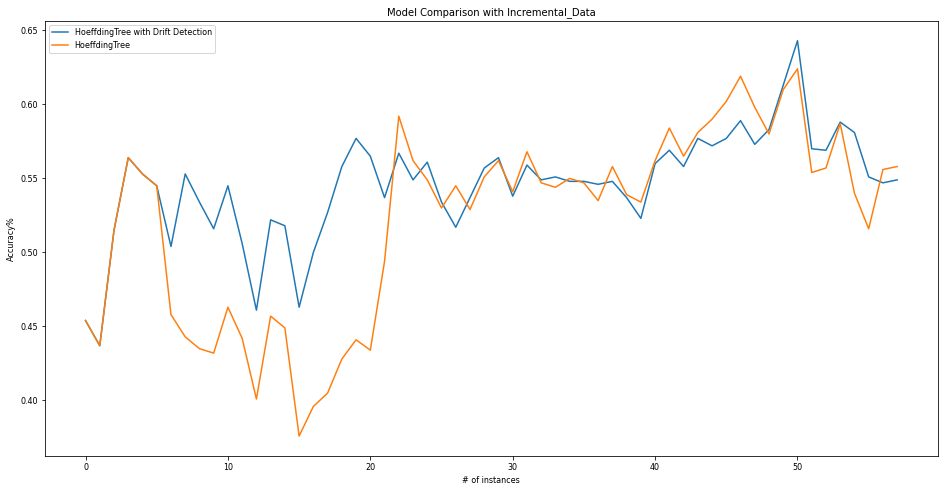

In [209]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.xlabel('# of instances')
plt.ylabel('Accuracy%')
plt.title("Model Comparison with Incremental_Data")
plt.plot(n_ins3,acc12_,label = 'HoeffdingTree with Drift Detection')
plt.plot(n_slides3,acc12,label = 'HoeffdingTree')
plt.legend()
plt.show()

In [210]:
acc_table_a['HoeffdingTree(DD)'] = np.mean(acc2_)

In [211]:
acc_table_i['HoeffdingTree(DD)'] = np.mean(acc12_)

In [212]:
acc_table_g['HoeffdingTree(DD)'] = np.mean(acc7_)

In [213]:
df_acc_a = pd.DataFrame(acc_table_a,index = [0])
df_acc_a

,dataset,no_change,majority,sam_knn,HoeffdingTree,HoeffdingAdaptiveTree,AdaptiveRandomForest,AccuracyWeightedEnsemble,HoeffdingTree(DD)
0,abrupt,0.286811,0.293396,0.695887,0.539415,0.610226,0.750453,0.614755,0.571


In [214]:
df_acc_i = pd.DataFrame(acc_table_i,index = [0])
df_acc_i

,dataset,no_change,majority,sam_knn,HoeffdingTree,HoeffdingAdaptiveTree,AdaptiveRandomForest,AccuracyWeightedEnsemble,HoeffdingTree(DD)
0,incremental,0.157828,0.144966,0.573155,0.522207,0.548983,0.641948,0.592862,0.545793


In [215]:
df_acc_g = pd.DataFrame(acc_table_g,index = [0])
df_acc_g

,dataset,no_change,majority,sam_knn,HoeffdingTree,HoeffdingAdaptiveTree,AdaptiveRandomForest,AccuracyWeightedEnsemble,HoeffdingTree(DD)
0,gradual,0.36708,0.3936,0.75008,0.6108,0.6256,0.78044,0.61568,0.6108


In [216]:
df_acc = pd.concat([df_acc_a,df_acc_g,df_acc_i])
df_acc

,dataset,no_change,majority,sam_knn,HoeffdingTree,HoeffdingAdaptiveTree,AdaptiveRandomForest,AccuracyWeightedEnsemble,HoeffdingTree(DD)
0,abrupt,0.286811,0.293396,0.695887,0.539415,0.610226,0.750453,0.614755,0.571000
0,gradual,0.367080,0.393600,0.750080,0.610800,0.625600,0.780440,0.615680,0.610800
0,incremental,0.157828,0.144966,0.573155,0.522207,0.548983,0.641948,0.592862,0.545793
